In [13]:
resonators = list(range(1, 9))

In [34]:
from snn.resonator import test_resonator_on_chirp, trained_resonator

freq0 = 8
resonator = trained_resonator(
    freq0,
    filters_folder='filters4_xi0'
)
resonator.log_out_spikes(-1)
step = 1 / 500_000
spectrum = 2 * freq0
test_size = int(spectrum / step)
clk_freq = resonator.clk_freq
start_freq = 0
test_resonator_on_chirp(
    resonator,
    start_freq=start_freq,
    step=step,
    test_size=test_size,
    clk_freq=clk_freq
)


8.48826363156775

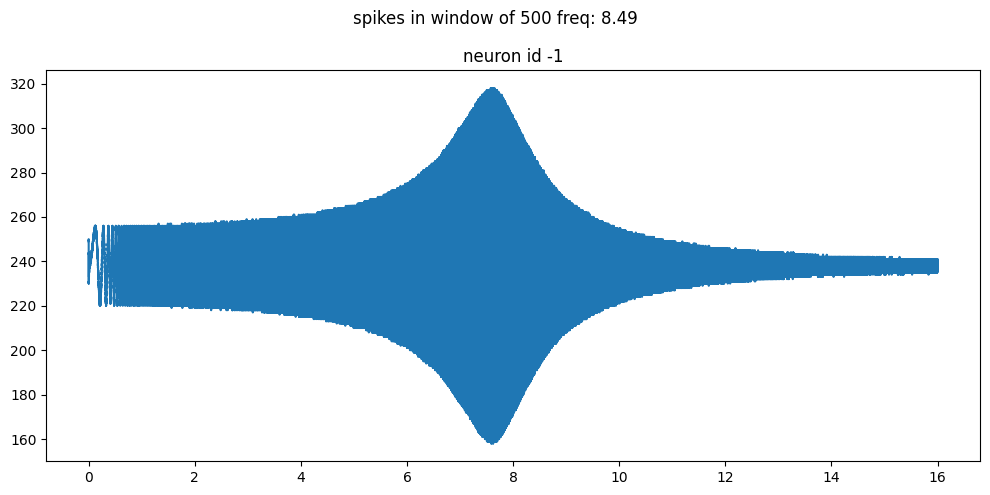

In [35]:

from matplotlib import pyplot as plt
from snn.resonator import lp_by_lf, freq_of_resonator
import numpy as np

best_lp = lp_by_lf(5, freq0, clk_freq)
f_resonator = freq_of_resonator(clk_freq, 5, best_lp)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
fig.suptitle(f'spikes in window of {500} freq: {f_resonator:.2f}')
spikes_window = 500
nid = -1
spikes_neuron = resonator.neurons[nid]
y_events = spikes_neuron.out_spikes()
y_spikes = np.zeros(test_size)
y_spikes[y_events] = 1
y_spikes = np.convolve(y_spikes, np.ones(spikes_window, dtype=int), 'valid')
x = np.linspace(start_freq, start_freq+spectrum, len(y_spikes))

ax = axs
ax.plot(x, y_spikes)
ax.set_title(f'neuron id {nid}')
fig.tight_layout()
f_resonator